In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
np.set_printoptions(threshold=np.inf)
import warnings
warnings.filterwarnings('ignore')

In [49]:
def multivariate_normal_pdf_v2(x, mean, sigma):
    l = x.shape[1]
    det_S = np.linalg.det(sigma)
    norm_const = 1.0/((2.0*np.pi)**(l/2.0)*np.sqrt(det_S))
    inv_S = np.linalg.inv(sigma)
    a1    = np.sum(np.dot(x-mean, inv_S)*(x-mean), axis = 1)
    
    return norm_const*np.exp(-0.5*a1)

def classification(P1,X_test,m1,m2,S1,S2,classes_test):
    p1 = P1*multivariate_normal_pdf_v2(X_test.T, m1 , S1)
    p2 = P2*multivariate_normal_pdf_v2(X_test.T, m2 , S2)
    Pmatrix = np.stack((p1, p2), axis = 1)

    # Classification of the data points
    classes_test = np.zeros(N)
    for i in range(0, N): 
        if (p1[i] > p2[i]):
            classes_test[i] = 0
        else:
            classes_test[i] = 1

# Part i

(2, 3000)


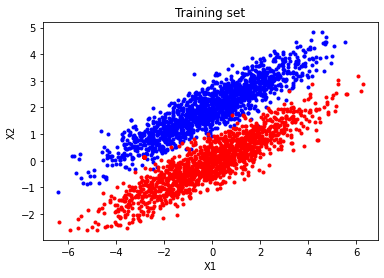

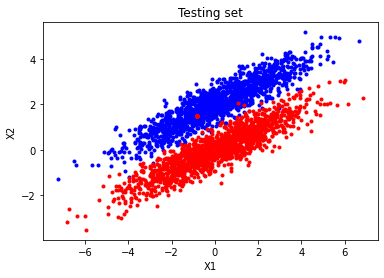

In [50]:
np.random.seed()
N = 1500
P1 = P2 = 1/2 

m1 = np.array([0, 2])
m2 = np.array([0, 0])

S1 = np.array([[4, 1.8],
              [1.8, 1]])

S2 = np.array([[4, 1.8],
              [1.8, 1]])

X1 = np.random.multivariate_normal(m1, S1, N)
X2 = np.random.multivariate_normal(m2, S2, N)
X =  np.concatenate((X1,X2), axis=0).T
Y1 = 0*np.ones((N, 1))  
Y2 = 1*np.ones((N, 1)) 
Y = np.concatenate((Y1, Y2), axis = 0).T
print(X.shape)

plt.figure(1)
plt.plot(X[0, np.nonzero(Y == 0)], X[1, np.nonzero(Y == 0)], '.b')
plt.plot(X[0, np.nonzero(Y == 1)], X[1, np.nonzero(Y == 1)], '.r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training set')
plt.show()

np.random.seed(5)

X1_test = np.random.multivariate_normal(m1, S1, N)
X2_test = np.random.multivariate_normal(m2, S2, N)
X_test =  np.concatenate((X1_test,X2_test), axis=0).T
Y1_test = 0*np.ones((N, 1))  
Y2_test = 1*np.ones((N, 1)) 
Y_test = np.concatenate((Y1_test, Y2_test), axis = 0).T


plt.figure(2)
plt.plot(X_test[0, np.nonzero(Y_test == 0)], X_test[1, np.nonzero(Y_test == 0)], '.b')
plt.plot(X_test[0, np.nonzero(Y_test == 1)], X_test[1, np.nonzero(Y_test == 1)], '.r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Testing set')
plt.show()

# Part ii 

In [51]:
# Bayes classification of X_test
# Estimation of pdf's for each data point
classification(P1,X_test,m1,m2,S1,S2,classes_test)

# Part iii and iv

In [52]:
# Error probability estimation
Pe = 0  # Probability of error
for i in range(0, N):  # = 1:N
    if classes_test[i] != Y_test[0][i]:
        Pe += 1

Pe /= N
print('P[error_bayesian]: %f' % Pe)

X = np.concatenate((X, np.ones((1, N*2))), axis=0)
[l, p] = X.shape

X_test = np.concatenate((X_test, np.ones((1, N*2))), axis=0)
[l, p_test] = X_test.shape

rho = 0.001
    
theta_ini = np.array([-2, -1, 1]).T  # random theta
theta = theta_ini
e_thres = 10e-4  # threshold for the termination of the algorithm
iter = 0   # Iteration counter
e = 1  # The difference between the previous and the current estimate of theta
while e>e_thres:
    iter +=1  # Increment the iteration counter
    theta_old = theta  # Store the current theta
    S = 1 / (1+np.exp(-np.dot(theta.T, X))) # Computation of the vector 'S'
    theta = theta - rho * np.dot(X, (S-Y).T)  # Updating of the vector 'theta'
    e = np.sum(np.abs(theta-theta_old))  # Absolute difference between the current and the previous values of 'theta'
    
# Evaluating the performance of the logistic regression
S_test = 1 / (1+np.exp(-np.dot(theta.T, X_test)))
Pe_log = 0
for i in range(0, p_test):
    if ((S_test[0][i] > 0.5) & (Y_test[0][i] != 1)) | ((S_test[0][i] < 0.5) & (Y_test[0][i] != 0)):
        Pe_log += 1

Pe_log /= p_test
print('P{error_logistic: %f' % Pe_log)

P[error_bayesian]: 0.012667
P{error_logistic: 0.009667


# Part v

(2, 3000)


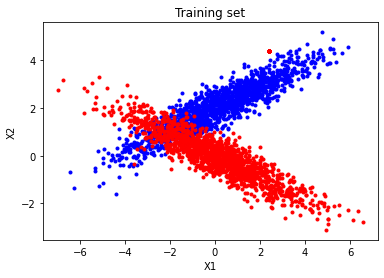

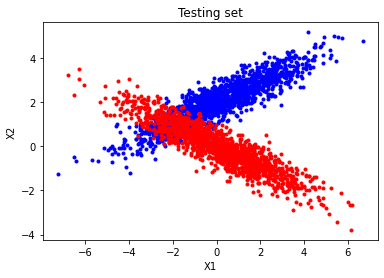

P[error_bayesian]: 0.012667
P{error_logistic: 0.163333


In [53]:
np.random.seed()
N = 1500
P1 = P2 = 1/2 

m1 = np.array([0, 2])
m2 = np.array([0, 0])

S1 = np.array([[4, 1.8],
              [1.8, 1]])

S2 = np.array([[4, -1.8],
              [-1.8, 1]])

X1 = np.random.multivariate_normal(m1, S1, N)
X2 = np.random.multivariate_normal(m2, S2, N)
X =  np.concatenate((X1,X2), axis=0).T
Y1 = 0*np.ones((N, 1))  
Y2 = 1*np.ones((N, 1)) 
Y = np.concatenate((Y1, Y2), axis = 0).T
print(X.shape)

plt.figure(1)
plt.plot(X[0, np.nonzero(Y == 0)], X[1, np.nonzero(Y == 0)], '.b')
plt.plot(X[0, np.nonzero(Y == 1)], X[1, np.nonzero(Y == 1)], '.r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training set')
plt.show()

np.random.seed(5)

X1_test = np.random.multivariate_normal(m1, S1, N)
X2_test = np.random.multivariate_normal(m2, S2, N)
X_test =  np.concatenate((X1_test,X2_test), axis=0).T
Y1_test = 0*np.ones((N, 1))  
Y2_test = 1*np.ones((N, 1)) 
Y_test = np.concatenate((Y1_test, Y2_test), axis = 0).T


plt.figure(2)
plt.plot(X_test[0, np.nonzero(Y_test == 0)], X_test[1, np.nonzero(Y_test == 0)], '.b')
plt.plot(X_test[0, np.nonzero(Y_test == 1)], X_test[1, np.nonzero(Y_test == 1)], '.r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Testing set')
plt.show()


classification(P1,X_test,m1,m2,S1,S2,classes_test)

Pe = 0  # Probability of error
for i in range(0, N):  # = 1:N
    if classes_test[i] != Y_test[0][i]:
        Pe += 1

Pe /= N
print('P[error_bayesian]: %f' % Pe)

X = np.concatenate((X, np.ones((1, N*2))), axis=0)
[l, p] = X.shape

X_test = np.concatenate((X_test, np.ones((1, N*2))), axis=0)
[l, p_test] = X_test.shape

rho = 0.001
    
theta_ini = np.array([-2, -1, 1]).T  # random theta
theta = theta_ini
e_thres = 10e-4  # threshold for the termination of the algorithm
iter = 0   # Iteration counter
e = 1  # The difference between the previous and the current estimate of theta
while e>e_thres:
    iter +=1  # Increment the iteration counter
    theta_old = theta  # Store the current theta
    S = 1 / (1+np.exp(-np.dot(theta.T, X))) # Computation of the vector 'S'
    theta = theta - rho * np.dot(X, (S-Y).T)  # Updating of the vector 'theta'
    e = np.sum(np.abs(theta-theta_old))  # Absolute difference between the current and the previous values of 'theta'
    
# Evaluating the performance of the logistic regression
S_test = 1 / (1+np.exp(-np.dot(theta.T, X_test)))
Pe_log = 0
for i in range(0, p_test):
    if ((S_test[0][i] > 0.5) & (Y_test[0][i] != 1)) | ((S_test[0][i] < 0.5) & (Y_test[0][i] != 0)):
        Pe_log += 1

Pe_log /= p_test
print('P{error_logistic: %f' % Pe_log)

# Comments:

***1. Error probability of bayesian classification is slightly lower than that of logistic regression. This is due to the fact that Naive Bayes has a higher bias but lower variance compared to logistic regression so it performs better.***

***2. When the training size reaches infinity the discriminative model: logistic regression performs better than the generative model Naive Bayes.***

***3. Logistic Regression makes a prediction for the probability using a direct functional form where as Naive Bayes figures out how the data was generated given the results.***